# **AMAZON WEB SERVICE**
#  **SaaS SALES**

# 1. Latar Belakang

AWS SaaS Sales adalah kumpulan data transaksi perusahaan AWS yang menyediakan perangkat lunak untuk penjualan dan pemasaran kepada perusahaan lain (B2B) dari tahun 2020 hingga tahun 2023. Data ini dirancang untuk merepresentasikan aktivitas transaksi bisnis dari perusahaan AWS, yang melibatkan pelanggan yang berasal dari berbagai industri, wilayah geografis, dan segmen bisnis. Data transaksi tersebut diharapkan dapat memberikan wawasan yang mendalam mengenai tren penjualan dan performa Produk yang dijual yang berguna bagi perusahaan agar dapat merencanakan strategi penjualan untuk masa depan berdasarkankan data.

# 2. Pernyataan Masalah
Perusahaan ingin mengetahui profitabilitas perusahaan dengan cara memahami bagaimana pola pembelian, kontribusi setiap segmen pelanggan terhadap Profit margin, dan kotribusi setiap negara terhadap profit Margin. Informasi ini diperlukan untuk mengoptimalkan strategi penjualan dan memaksimalkan keuntungan perusahaan.

Sebagai seorang data analyst, kita akan mencoba menjawab pertanyaan berikut:

1. apakah ada pola transaksi dari tren Sales dan Profit setiap bulan dan  sertiap quarter dari tahun 2020 hingga 2023?
2. apakah ada pola transaksi dari tren Profit Margin setiap bulan dan  sertiap quarter dari tahun 2020 hingga 2023?
3. Bagaimana performa masing-masing Produk dalam kontribusi Profit Margin?
4. Bagaimana performa masing-masing Industri dari setiap segmen pelanggan dalam kontribusi Profit Margin?
5. Bagaimana performa masing-masing Negara dari setiap Region dalam kontribusi Profit Margin?

# 3. Stakeholder

1. Tim Digital Marketing 
2. Tim Developer

# 4. Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('SaaS-Sales.csv')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


## 4.1 Informasi dari setiap kolom

1. Row ID: Nomor urut atau identifikasi unik untuk setiap baris dalam dataset.
2. Order ID: Kode unik untuk setiap pesanan/transaksi.
3. Order Date: Tanggal ketika pesanan dibuat.
4. Date Key: Representasi numerik dari tanggal (YYYYMMDD).
5. Contact Name: Nama orang yang bertanggung jawab atas kontak untuk pesanan tersebut.
6. Country: Negara tempat pelanggan berada.
7. City: Kota tempat pelanggan berada.
8. Region: Wilayah geografis yang lebih besar (misalnya, EMEA untuk Eropa, Timur Tengah, dan Afrika).
9. Subregion: Subdivisi lebih spesifik dari wilayah, seperti "UKIR" (UK & Ireland) atau "EU-WEST" (Eropa Barat).
10. Customer: Nama pelanggan atau organisasi yang melakukan pembelian.
11. Customer ID: Identifikasi unik untuk setiap pelanggan.
12. Industry: Sektor industri tempat pelanggan beroperasi (misalnya, energi, ritel).
13. Segment: Klasifikasi pelanggan berdasarkan ukuran atau strategi bisnis, seperti SMB (Small and Medium Business) atau Strategic.
14. Product: Nama produk atau layanan yang dijual.
15. License: ID unik untuk lisensi produk yang dikeluarkan.
16. Sales: Total nilai penjualan untuk transaksi tertentu (dalam mata uang tertentu).
17. Quantity: Jumlah unit produk yang dibeli dalam transaksi tertentu.
18. Discount: Persentase atau nilai diskon yang diberikan untuk pesanan tersebut.
19. Profit: Keuntungan bersih dari transaksi tersebut (penjualan dikurangi biaya terkait).

# 5. Data Understanding

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Dari info ini, kita bisa melihat bahwa setiap kolom sudah sesuai dengan datatype nya atau tidak. hanya kolom `Order Date` yang belum sesuai dengan datatype nya yaitu `datetime64[ns]`. Sisanya sudah sesuai dengan datatype nya.

In [5]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,3NTBV9B3PS
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [6]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

1. Order ID: Ada 5009 Orer ID yang unik. ID ini memiliki format yang diawali Region (EMEA, AMER, APJ) dan tahun ID tersebut dibuat.
2. Order Date: Terdapat 1237 Order Date unik, kumpulan data terjadi dari tanggal 04-01-2020 hingga 31-12-2023
3. Contact Name: Ada 793 Contact Name unik, ini menunjukkan banyaknya kontak pelanggan.
4. Country & City: Terdapat 48 negara unik dan 262 kota unik, yang menunjukan jangkauan pelanggan secara geografis yang luas.
5. Region & Subregion: Terdapat 3 Region unik dan 12 Subregion, yang mungkin mewakili klasifikasi geografis berbeda dalam wilayah tersebut.
6. Customer & Customer ID: Terdapat 99 Customer unik dan Customer ID unik, yang menunjukkan pelanggan yang beragam dan setiap pelanggan memiliki ID pelanggan unik.
7. Industry & Segment: Terdapat 10 industry unik dan 3 segment unik yang menunjukkan banyaknya industry dan segment pelanggan dalam kumpulan data.
8. Product & Lisence: Ada 14 product unik dan 9994 kode lisence unik. Hal ini menunjukkan semua produk beserta dengan kode lisensi yang bervariasi.
9. Sales, Quantity, Diskon, Profit: Kolom ini berisi berbagai nilai numerik dengan rentang berbeda, yang menunjukkan beragam jumlah Sales, Quantity yang dipesan, tarif diskon yang diterapkan, dan Profit yang dihasilkan di seluruh kumpulan data.

# 6. Data Cleaning

## 6.1 Hapus Baris Duplikat

In [7]:
df.duplicated().sum()

np.int64(0)

Pada data ini, Tidak ditemukan baris yang duplikat.

## 6.2 Cek Missing Value

In [8]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Pada data ini, Tidak ada Missing Value di seluruh kolom.

## 6.3 Mengubah tipe data 'Order Date' ke format datetime 

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d')
df['Order Date']

0      2022-11-09
1      2022-11-09
2      2022-06-13
3      2021-10-11
4      2021-10-11
          ...    
9989   2020-01-22
9990   2023-02-27
9991   2023-02-27
9992   2023-02-27
9993   2023-05-05
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

## 6.4 Validasi Kolom Numerik

untuk memastikan kualitas dan akurasi data.

In [11]:
df[(df['Quantity'] < 0) | (df['Sales'] < 0) | (df['Discount'] < 0)]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


## 6.5 Menambahkan Kolom yang dibutuhkan

> Menambahkan kolom Margin

In [12]:
df['Profit Margin'] = (df['Profit'] / df['Sales'])*100
df['Profit Margin'] 

0       16.00
1       30.00
2       47.00
3      -40.00
4       11.25
        ...  
9989    16.25
9990    17.00
9991    7.50 
9992    45.00
9993    30.00
Name: Profit Margin, Length: 9994, dtype: float64

Menambahkan kolom `Profit Margin` membantu kita memahami berapa banyak `Profit` yang diperoleh perusahaan `dibandingkan` dengan `Salesnya`. Ini menunjukkan seberapa efisien perusahaan mengubah Sales menjadi Profit.

> Menambahkan kolom Year

In [13]:
df['Year'] = df['Order Date'].dt.year
df['Year']

0       2022
1       2022
2       2022
3       2021
4       2021
        ... 
9989    2020
9990    2023
9991    2023
9992    2023
9993    2023
Name: Year, Length: 9994, dtype: int32

Menambahkan kolom `Year` membantu kita mengetahui `Tahun` transaksi tersebut terjadi

> Menambahkan kolom Month dengan format yy-mm

In [14]:
df['Month'] = df['Order Date'].dt.month
df['Month']

0       11
1       11
2       6 
3       10
4       10
        ..
9989    1 
9990    2 
9991    2 
9992    2 
9993    5 
Name: Month, Length: 9994, dtype: int32

Menambahkan kolom `Month` membantu kita mengetahui `Bulan` transaksi tersebut terjadi.

> Menambahkan kolom Quarter dengan format yyyyQ

In [15]:
df['Quarter'] = df['Order Date'].dt.to_period('Q').astype(str)
df['Quarter']

0       2022Q4
1       2022Q4
2       2022Q2
3       2021Q4
4       2021Q4
         ...  
9989    2020Q1
9990    2023Q1
9991    2023Q1
9992    2023Q1
9993    2023Q2
Name: Quarter, Length: 9994, dtype: object

Menambahkan kolom `Quarter` membantu kita mengetahui `Quarter` transaksi tersebut terjadi.

> Menambahkan kolom Harga setiap transaksi

In [16]:
df['Price'] = df['Sales']/df['Quantity']
df['Price']

0       130.9800
1       243.9800
2       7.3100  
3       191.5155
4       11.1840 
         ...    
9989    8.4160  
9990    45.9800 
9991    129.2880
9992    7.4000  
9993    121.5800
Name: Price, Length: 9994, dtype: float64

Menambahkan kolom `Price` membantu kita mengetahui `Harga 1 pcs produk` setiap transaksi tersebut terjadi.

##  6.7 menghapus kolom yang tidak dibutuhkan

In [17]:
df.drop(columns='Date Key', inplace=True)

Kolom `Date Key` Representasi numerik dari tanggal (YYYYMMDD). Kita tidak membutuhkan Kolom ini untuk analisis karena sudah diwakili kolom Order Date

> Simpan Data dalam bentuk file Excel 

In [18]:
df.to_excel('Cleaned SaaS-Sales-Data(wo dk).xlsx', index=False)

# 7. Anaisis Data

## 7.1 Normalitas Data

> **Skew**
- Skewness > 0 berarti data right-skewed (pencilan berada di kanan).
- Skewness < 0 berarti data left-skewed (pencilan berada di kiri).
- Skewness = 0 menunjukkan data normal atau simetris.

> **Kurtosis**
- Kurtosis > 3 berarti distribusi data leptokurtic, yang lebih tajam dan lebih tinggi puncaknya dibandingkan distribusi normal.
- Kurtosis < 3 berarti distribusi data platykurtic, yang lebih datar dan memiliki puncak lebih rendah.
- Kurtosis = 3 berarti distribusi data mesokurtic, yang mengikuti distribusi normal.

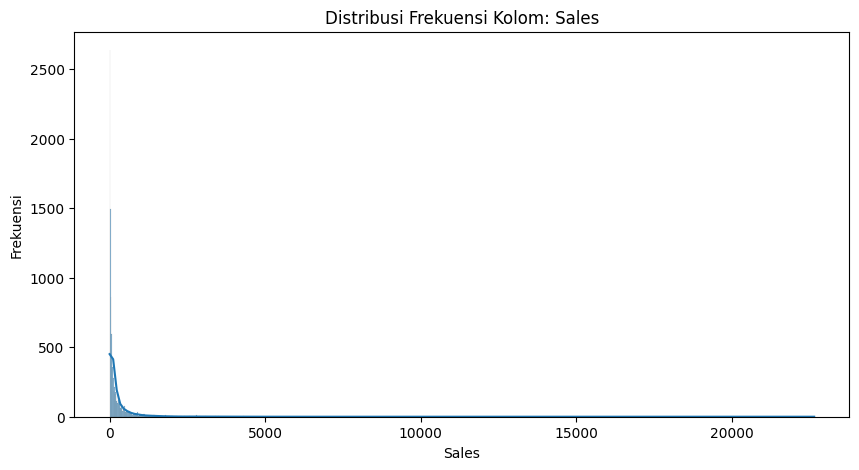

--- Statistik untuk Kolom: Sales ---
Skewness untuk Sales: 12.9728 - Right Skew
Kurtosis untuk Sales: 308.3118 - Leptokurtic


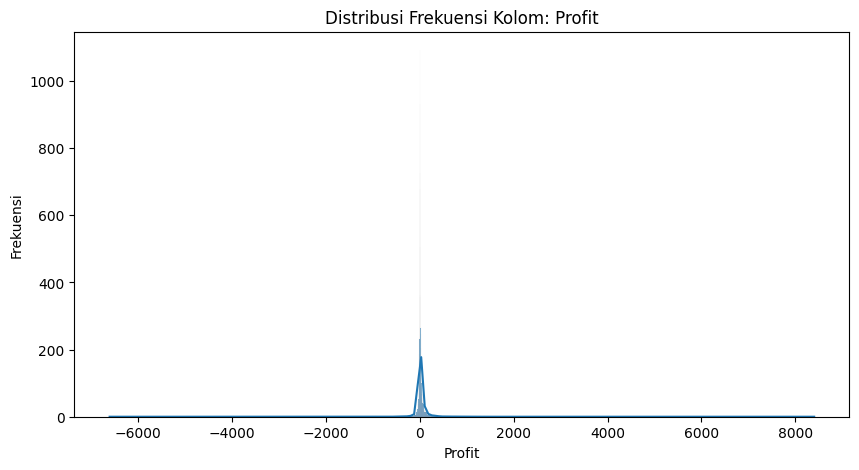

--- Statistik untuk Kolom: Profit ---
Skewness untuk Profit: 7.5614 - Right Skew
Kurtosis untuk Profit: 400.1885 - Leptokurtic


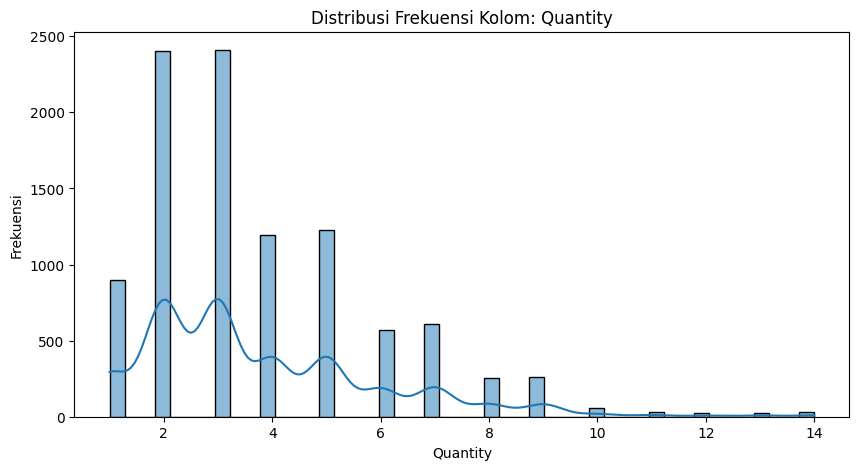

--- Statistik untuk Kolom: Quantity ---
Skewness untuk Quantity: 1.2785 - Right Skew
Kurtosis untuk Quantity: 4.9919 - Leptokurtic


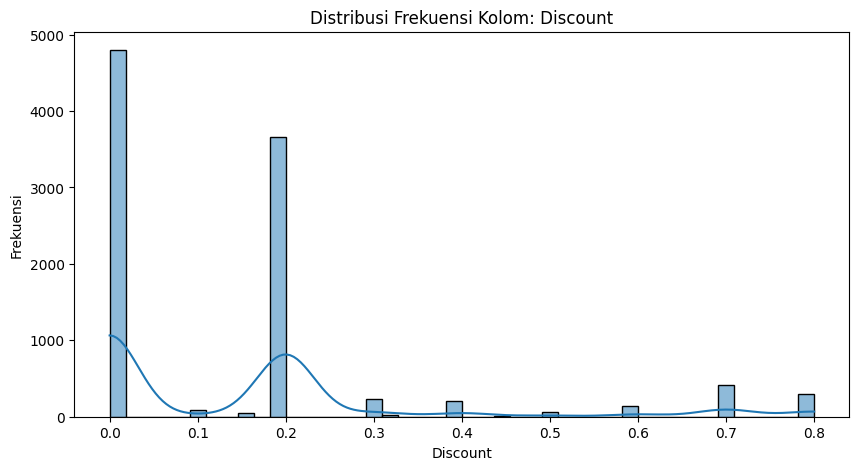

--- Statistik untuk Kolom: Discount ---
Skewness untuk Discount: 1.6843 - Right Skew
Kurtosis untuk Discount: 5.4095 - Leptokurtic


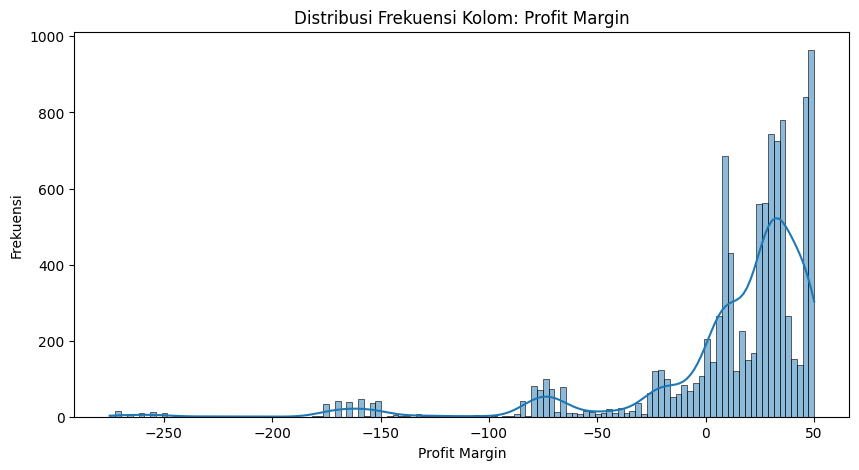

--- Statistik untuk Kolom: Profit Margin ---
Skewness untuk Profit Margin: -2.8948 - Left Skew
Kurtosis untuk Profit Margin: 13.1733 - Leptokurtic


In [19]:
columns_to_check = ['Sales', 'Profit', 'Quantity', 'Discount', 'Profit Margin']

for column in columns_to_check:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=column, kde=True)  
    plt.title(f'Distribusi Frekuensi Kolom: {column}') 
    plt.xlabel(column)  
    plt.ylabel('Frekuensi') 
    plt.show() 

        # Menghitung skewness dan kurtosis per kolom
    skewness_value = df[column].skew()  
    kurtosis_value = df[column].kurt()+3 

    # kesimpulan skew
    if skewness_value > 0:
        skewness_desc = "Right Skew"
    elif skewness_value < 0:
        skewness_desc = "Left Skew"
    else:
        skewness_desc = "Normal Distribution"
    
    # kesimpulan kurtosis
    if kurtosis_value > 3:
        kurtosis_desc = "Leptokurtic"
    elif kurtosis_value < 3:
        kurtosis_desc = "Platykurtic"
    else:
        kurtosis_desc = "Mesokurtic Distribution"

    # Print hasil dan kesimpulan untuk kolom tersebut
    print(f"--- Statistik untuk Kolom: {column} ---")
    print(f"Skewness untuk {column}: {skewness_value:.4f} - {skewness_desc}")
    print(f"Kurtosis untuk {column}: {kurtosis_value:.4f} - {kurtosis_desc}")

Dari Grafik-grafik di atas, bisa di disimpulkan bahwa semua data diatas `tidak terdistribusi normal`, Karena Semua data tersebut memiliki `Skewness != 0` menunjukkan data tidak terdistribusi normal atau tidak simetris dan Semua data tersebut juga memiliki `Kurtosis != 3` yang berarti distribusi data bukan mesokurtic atau data tidak terdistribusi normal.

## 7.2 outliers

<Axes: xlabel='Sales'>

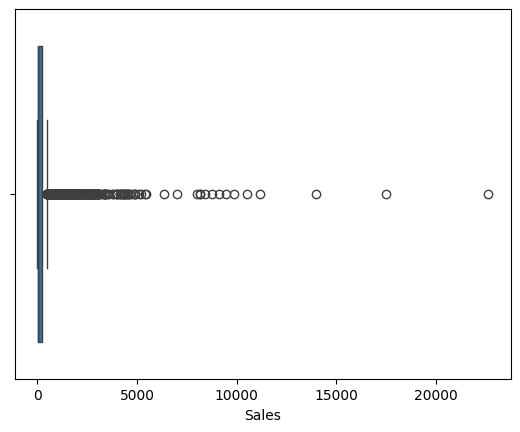

In [20]:
sns.boxplot(df, x='Sales')

In [21]:
q1_sales = df['Sales'].quantile(0.25)
q3_sales = df['Sales'].quantile(0.75)
iqr_sales = q3_sales - q1_sales
upper_bound_sales = q3_sales + 1.5 * iqr_sales
print(f'jumlah outlier: {len(df[df['Sales'] >= upper_bound_sales])}')
print(f'Batas upper bound: {upper_bound_sales}')

jumlah outlier: 1167
Batas upper bound: 498.93


Ini berarti ada `1167` Sales yang melebihi `$ 498.93` dan tampaknya ada sales dalam kisaran $ 10.000 dan Sales lebih tinggi

<Axes: xlabel='Discount'>

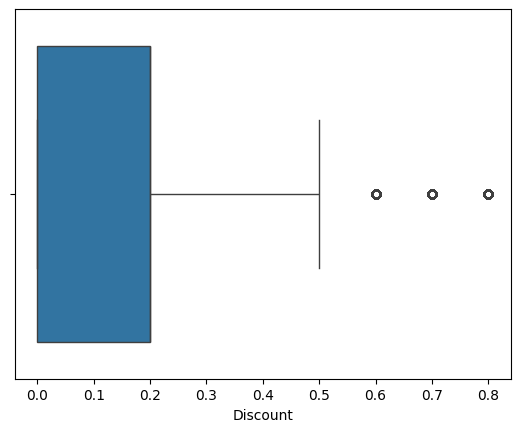

In [22]:
sns.boxplot(df, x='Discount')

In [23]:
q1_Discount = df['Discount'].quantile(0.25)
q3_Discount = df['Discount'].quantile(0.75)
iqr_Discount = q3_Discount - q1_Discount
upper_bound_Discount = q3_Discount + 1.5 * iqr_Discount
print(f'jumlah outlier: {len(df[df['Discount'] >= upper_bound_Discount])}')
print(f'Batas upper bound: {upper_bound_Discount}')

jumlah outlier: 922
Batas upper bound: 0.5


Ini berarti ada `922` Discount yang melebihi `50%` dan tampaknya ada Discount yang mencapai `80%`

<Axes: xlabel='Quantity'>

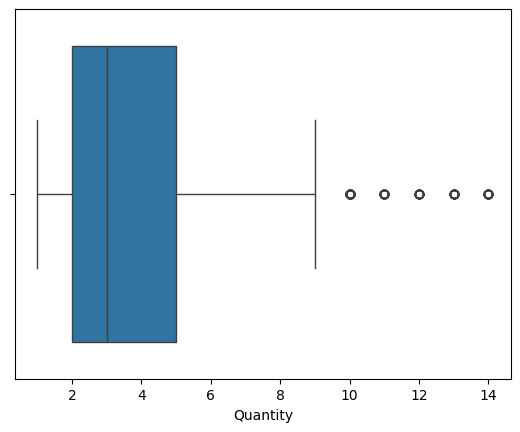

In [24]:
sns.boxplot(df, x='Quantity')

In [25]:
q1_Quantity = df['Quantity'].quantile(0.25)
q3_Quantity = df['Quantity'].quantile(0.75)
iqr_Quantity = q3_Quantity - q1_Quantity
upper_bound_Quantity = q3_Quantity + 1.5 * iqr_Quantity
print(f'jumlah outlier: {len(df[df['Quantity'] >= upper_bound_Quantity])}')
print(f'Batas upper bound: {upper_bound_Quantity}')

jumlah outlier: 170
Batas upper bound: 9.5


Ini berarti ada `170` Quantity yang melebihi `9,5 pcs` dan tampaknya ada Quantity yang mencapai `14 pcs`

<Axes: xlabel='Profit Margin'>

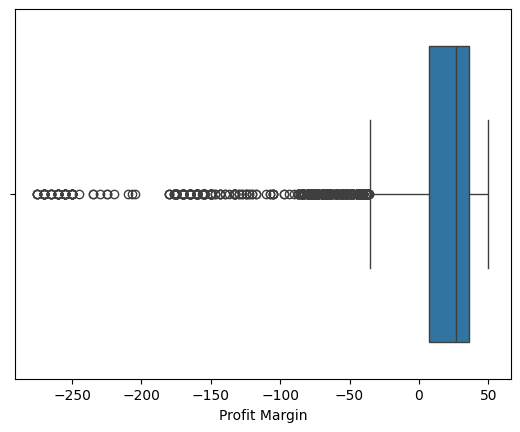

In [26]:
sns.boxplot(df, x='Profit Margin')

In [27]:
q1_Margin = df['Profit Margin'].quantile(0.25)
q3_Margin = df['Profit Margin'].quantile(0.75)
iqr_Margin = q3_Margin - q1_Margin
lower_bound_Margin = q1_Margin - 1.5 * iqr_Margin
print(f'jumlah outlier: {len(df[df['Profit Margin'] <= lower_bound_Margin])}')
print(f'Batas lower bound: {lower_bound_Margin}')

jumlah outlier: 952
Batas lower bound: -35.625


Ini berarti ada `952` Transaksi yang melebihi `-35.625%`, ini berarti ada transaksi yang dengan Profit negatif yang mempengaruhi margin

<Axes: xlabel='Profit'>

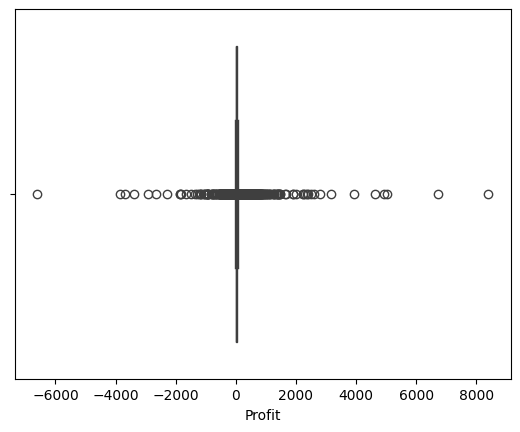

In [28]:
sns.boxplot(df, x='Profit')

In [29]:
q1_pro = df['Profit'].quantile(0.25)
q3_pro = df['Profit'].quantile(0.75)
iqr_pro = q3_pro - q1_pro
upper_bound_pro = q3_pro + 1.5 * iqr_pro
lower_bound_pro = q1_pro - 1.5 * iqr_pro
print(f'jumlah outlier: {len(df[(df['Profit'] >= upper_bound_pro) | (df['Profit'] <= lower_bound_pro)])}')
print(f'Batas upper bound: {upper_bound_pro}')
print(f'Batas lower bound: {lower_bound_Margin}')

jumlah outlier: 1881
Batas upper bound: 70.816875
Batas lower bound: -35.625


Ada banyak keuntungan yang jauh `lebih tinggi` atau `lebih rendah` dari batasnya. Ini berarti mungkin ada banyak keuntungan yang sangat tinggi atau sangat rendah.

Kesimpulan Outlier:

dari hasil diatas, Tidak ada Outlier yang perlu dihapus. karen nilai nilai outlier tersebut `akan digunakan dalam analisa`. misalnya, mengapa margin rendah di Jepang atau Australia. Outlier sering kali `memperlihatkan fenomena penting atau pola unik` yang tidak boleh diabaikan. contohnya, margin yang sangat rendah karena diskon berlebihan.

## 7.3 Korelasi Data

In [30]:
numeric_var = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Profit Margin', 'Price']].corr('spearman')
numeric_var

,Sales,Quantity,Discount,Profit,Profit Margin,Price
Sales,1.000000,0.327426,-0.056969,0.518407,-0.199990,0.933574
Quantity,0.327426,1.000000,-0.000878,0.234491,0.000719,-0.010196
Discount,-0.056969,-0.000878,1.000000,-0.543350,-0.645173,-0.065158
Profit,0.518407,0.234491,-0.543350,1.000000,0.500206,0.458175
Profit Margin,-0.199990,0.000719,-0.645173,0.500206,1.000000,-0.211284
Price,0.933574,-0.010196,-0.065158,0.458175,-0.211284,1.000000


Text(0.5, 1.0, 'Korelasi antar kolom Numerik')

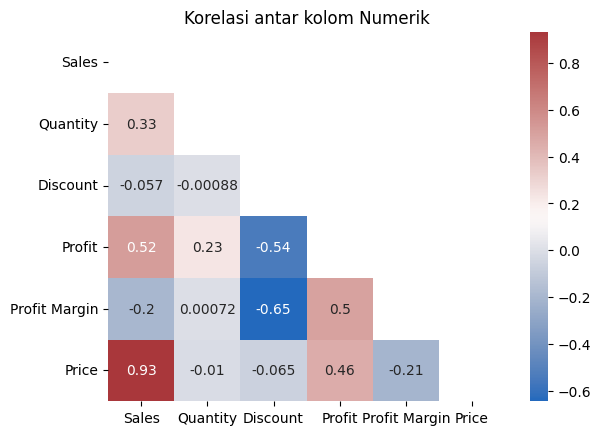

In [31]:
mask = np.triu(np.ones_like(numeric_var))
sns.heatmap(numeric_var, annot=True, cmap='vlag', mask=mask)
plt.title('Korelasi antar kolom Numerik')

- harga produk memiliki pengaruh yang kuat terhadap Sales. Semakin tinggi harga produk, semakin besar kontribusi nilai total sales. (korelasi positif)
- Profit memiliki pengaruh yang kuat terhadap Sales. Semakin tinggi peningkatan Sales berkontribusi signifikan pada peningkatan profit. (korelasi positif)
- Discount memiliki pengaruh yang kuat dengan profit. Semakin tinggi diskon cenderung diikuti oleh penurunan profit. (korelasi negatif)
- Discount memiliki pengaruh yang sangat kuat dengan profit margin. Semakin tinggi diskon semakin menurunan profit. (korelasi negatif)
- korelasi antara Discount dan Sales menunjukkan hubungan yang lemah. Artinya, peningkatan diskon tidak mempengaruhi penurunan Sales.
- Profit margin memiliki pengaruh yang kuat dengan profit. dimana profit margin yang tinggi secara signifikan berkontribusi pada peningkatan profit total. (korelasi positif)

## 7.4 Tren Sales dan Profit Berdasarkan Waktu:
Menentukan tren penjualan bulanan atau tahunan untuk melihat pola musiman atau pertumbuhan.

> Mencari bulan dengan Jumlah Sales dan Profit Tertinggi

In [32]:
sum_month = df.groupby(['Month'])[['Sales', 'Profit']].sum().reset_index()
sum_month

,Month,Sales,Profit
0,1,95365.9376,9199.2700
1,2,59913.1934,10281.4733
2,3,199512.4400,26813.9991
3,4,141851.5674,13437.8068
4,5,156122.2867,22308.5128
5,6,147082.6113,20899.3345
6,7,149580.8380,13535.3830
7,8,159589.4510,21896.7154
8,9,309770.0997,37293.1925
9,10,197115.2017,31469.6638


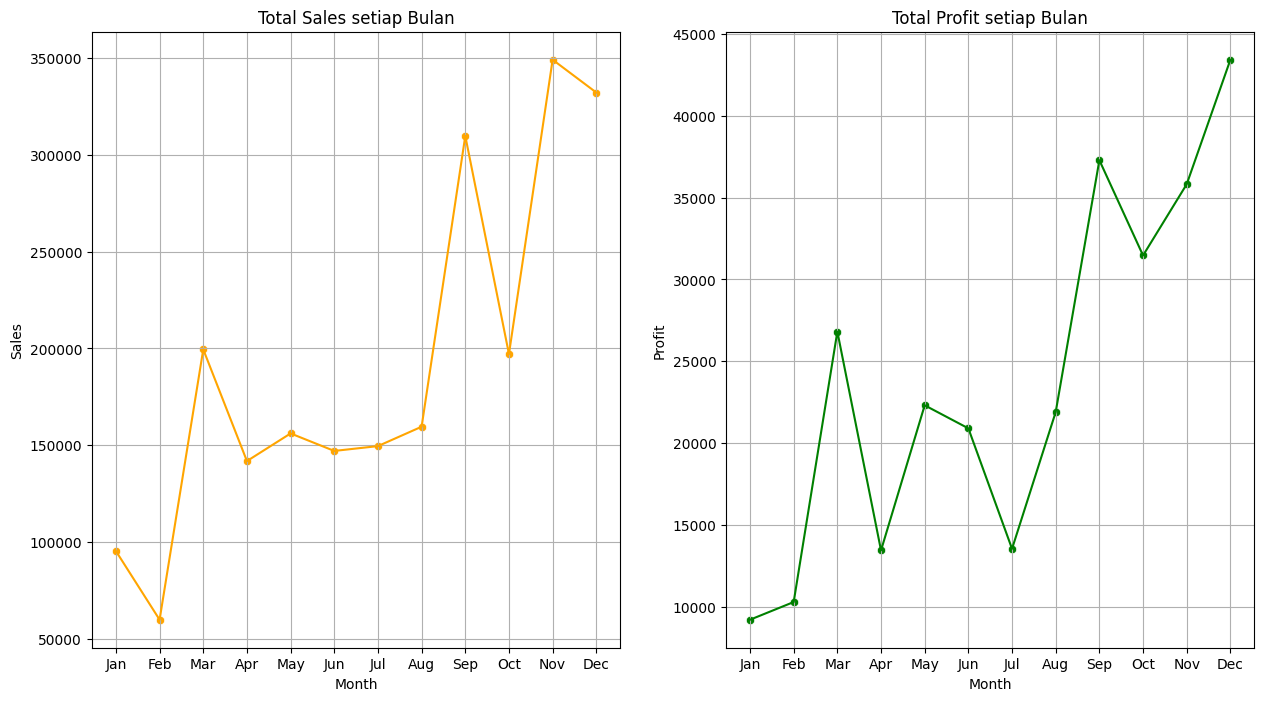

In [33]:
# Visualisasi
plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
sns.lineplot(sum_month, x='Month', y='Sales', color='orange')
sns.scatterplot(sum_month, x='Month',  y='Sales', color='orange')
plt.grid(visible=True)
plt.xticks(range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Total Sales setiap Bulan")


plt.subplot(1,2,2)
sns.lineplot(sum_month, x='Month', y='Profit', color='green')
sns.scatterplot(sum_month, x='Month',  y='Profit', color='green')
plt.grid(visible=True)
plt.xticks(range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Total Profit setiap Bulan")
plt.show()

Insight:
- Sales Dan Profit tertinggi terjadi pada bulan `September`, `November`, dan `Desember`.
- Sales Dan Profit sering kali mencapai `puncak tertinggi` pada `akhir tahun` (Desember atau November), ini kemungkinan bisa terjadi karena adanya hari besar seperti `Black Friday`, `Cyber Monday`, dan `Christmas`.
- Sales dan Profit `puncak tertinggi` juga terjadi di bulan `September`, ini mungkin bisa terjadi karena strategi pemasaran yang berhasil atau Perusahaan sering kali meluncurkan produk baru/mengumumkan pengembangan penting di bulan ini setiap tahunnya.
- Pada Bulan `Februari` secara konsisten memiliki sales yang `lebih rendah` dibandingkan bulan lainnya. Hal ini mungkin terjadi karena kurangnya efektifitas promosi atau Karena bulan ini bukan waktu puncak belanja. kita bisa menkonfirmasi dengan profit margin 

Rekomendasi:
- `Membuat Kampanye untuk Akhir Tahun` (November-Desember), karena pada bulan-bulan ini terdapat hari besar seperti Black Friday, Cyber Monday, dan Christmas. Perusahaan dapat memanfaatkan waktuhari-hari ini untuk `melakukan penawaran atau diskon khusus` untuk Customer baru maupun yang sudah ada.
- `Untuk awal tahun`, Perusahaan dapat menawarkan diskon awal tahun untuk paket berlanggana selama 1 tahunan yang akan berlaku hingga tahun berikutnya.
- `Meningkatkan Promosi di Pertengahan Tahun`, Perusahaan dapat merancang promosi atau diskon untuk layanan tertentu. Program bundling atau diskon untuk Customer baru atau yang ingin menambah kapasitas cloud mereka bisa efektif

> Tren Sales dam Profit per Quarter

In [34]:
tren = df.groupby(['Year', 'Quarter'])[['Sales', 'Profit']].sum().round(2).sort_values('Year').reset_index()
tren

,Year,Quarter,Sales,Profit
0,2020,2020Q1,74447.80,3811.23
1,2020,2020Q2,86538.76,11204.07
2,2020,2020Q3,143633.21,12804.72
3,2020,2020Q4,179627.73,21723.95
4,2021,2021Q1,68851.74,9264.94
5,2021,2021Q2,89124.19,12190.92
6,2021,2021Q3,130259.58,16853.62
7,2021,2021Q4,182297.01,23309.12
8,2022,2022Q1,92596.42,11446.34
9,2022,2022Q2,135370.11,16084.91


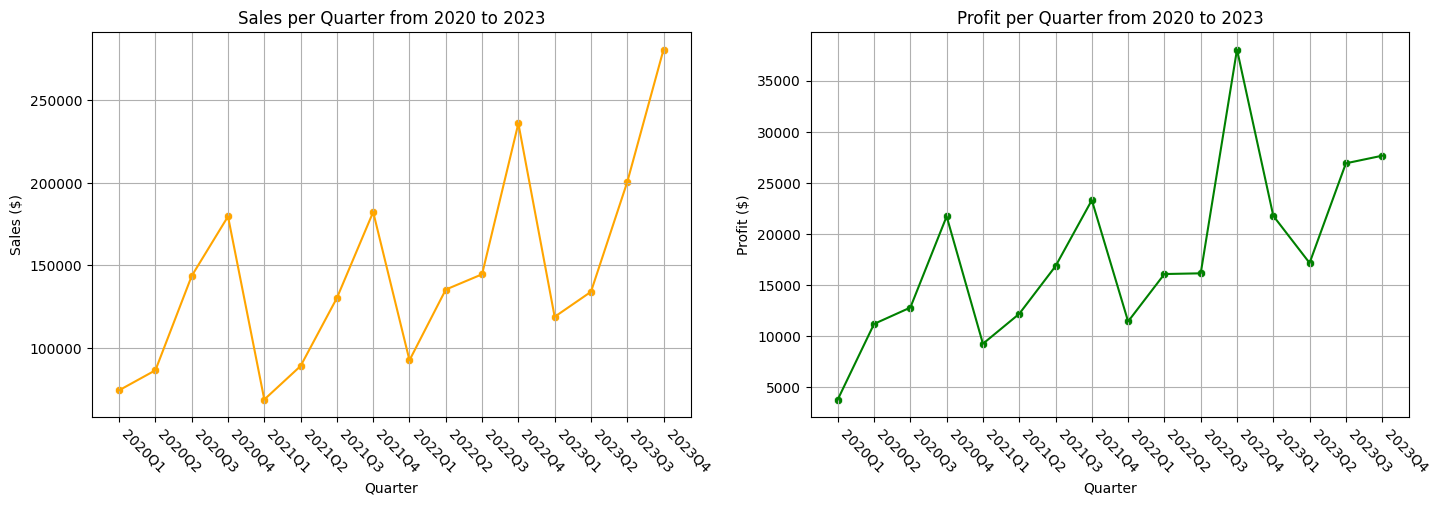

In [35]:
# Visualisasi
plt.figure(figsize=(17, 5))

plt.subplot(1,2,1)
sns.scatterplot(tren, x='Quarter', y='Sales', color='orange')
sns.lineplot(tren, x='Quarter', y='Sales', color='orange')
plt.grid(visible=True)
plt.ylabel('Sales ($)')
plt.xticks(rotation=-45, ha='left')
plt.title("Sales per Quarter from 2020 to 2023")

plt.subplot(1,2,2)
sns.scatterplot(tren, x='Quarter', y='Profit', color='green')
sns.lineplot(tren, x='Quarter', y='Profit', color='green')
# Menyesuaikan tampilan
plt.grid(visible=True)
plt.ylabel('Profit ($)')
plt.xticks(rotation=-45, ha='left')
plt.title("Profit per Quarter from 2020 to 2023")
plt.show()

Tren Sales:
- Tren Sales mengalami kenaikan yang signifikan dari tahun 2020 hingga 2023. Sales pada `kuartal terakhir(Q4) 2023` mencapai puncak tertinggi yang mencapai `$ 280594.82`.
- Terdapat sebuah pola, yang dimana Sales cenderung `lebih rendah` di `awal tahun (Q1)` dan akan `mengalami peningkatan` yang signifikan `sampai Akhir tahun`. Kenaikan ini mungkin bisa terjadi karena proyek akhir tahun dan meningkatnya aktivitas saat liburan.
- Tahun `2023` adalah tahun terbaik dari tahun-tahun sebelumnya, dengan `total Sales` Q4 2023 `hampir dua kali lipat` dibandingkan Q4 2022. ini mungkin bisa terjadi karena ekonomi dunia yang sudah membaik atau karena adanya proyek Re:Invent 2023.
- Pada Tahun `2020 awal` mengalami performa yang buruk. Hal ini terjadi karena adanya pandemi `COVID-19` yang menyebabkan Banyak perusahaan yang cenderung fokus pada mengurangi biaya operasional.

Tren Profit:
- Tren Profit mengalami kenaikan yang signifikan dari tahun 2020 hingga 2023. Sales pada `kuartal terakhir(Q4) 2022` mencapai puncak tertinggi yang mencapai `$ 38042.18`.
- Terdapat sebuah `pola yang sama` dengan Sales, yang dimana Profit cenderung `lebih rendah` di `awal tahun (Q1)` dan akan `mengalami peningkatan` yang signifikan `sampai Akhir tahun`.

Rekomendasi:
- Untuk mempertahankan tren positif, perusahaan dapat memanfaatkan momen di `Akhir Tahun (Q4)` dengan melakukan `promosi yang lebih agresif`.
- perusahaan juga dapat `menawarkan diskon awal tahun` di Q1 untuk menarik pelanggan baru atau mempertahankan pelanggan agar Sales meningkatkan.
- `Menambah Produk Baru` untuk meningkatkan margin Profit. Menambahkan produk atau layanan baru untuk melengkapi produk utama. contohnya, dengan mengembangkan layanan cloud lainnya seperti AI, machine learning. 

## 7.5 Tren Profit Margin

> Mencari Bulan dengan rata-rata margin Profit Tertinggi

In [36]:
marg_month = df.groupby(['Month'])[['Profit Margin']].median().reset_index()
marg_month

,Month,Profit Margin
0,1,27.0
1,2,27.0
2,3,27.0
3,4,26.0
4,5,27.0
5,6,27.5
6,7,26.0
7,8,28.0
8,9,28.0
9,10,26.0


Text(0.5, 1.0, 'Rata-rata Margin Profit setiap Bulan')

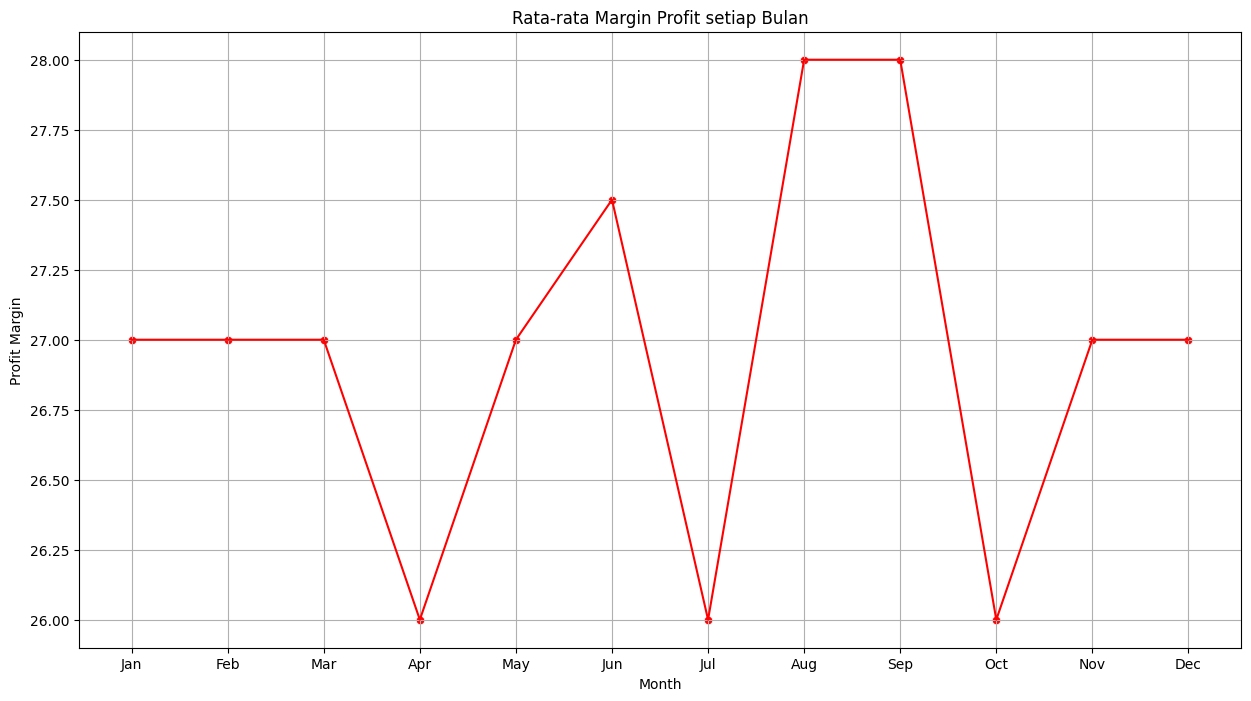

In [37]:
# Visualisasi
plt.figure(figsize=(15, 8))

sns.lineplot(marg_month, x='Month', y='Profit Margin', color='red')
sns.scatterplot(marg_month, x='Month', y='Profit Margin', color='red')
plt.grid(visible=True)
plt.xticks(range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Rata-rata Margin Profit setiap Bulan")

insight:
- Bulan dengan `margin profit tertinggi` adalah `Agutus` dan `September` sedangkan bulan dengan `margin profit terendah` adalah `April`, `Juli`, dan `Oktober`.
- Di awal tahun (Januari hingga Maret) dan akhir tahun (November hingga Desember), margin profit relatif `stabil`, berada pada sekitar angka `27%`. Hal ini mungkin bisa terjadi karena perusahaan memiliki strategi pengelolaan margin yang lebih stabil.
- Walaupun `Sales` dan `Profit` di bulan `Februari Menurun`, Profit margin menunjukan angka yang cenderung stabil di `27%`. dari sini kita bisa `menkonfirmasi` bahwa Sales dan Profit menurun mungin terjadi karena kurangnya efektifitas promosi atau Karena bulan ini bukan waktu puncak belanja.

Rekomendasi:
- `Buat rencana kampanye pemasaran bertema hari besar` seperti Natal atau Cyber Monday dan pastikan produk yang diluncurkan menarik perhatian pasar.
- `Perkenalkan kampanye bertema unik` seperti "Promosi Awal Tahun" atau insentif tambahan untuk mendorong pembelian di bulan februari.

> Tren Rata-rata margin Profit setiap Quarter

In [38]:
tren_marg = df.groupby(['Year', 'Quarter'])[['Profit Margin']].median().sort_values('Year').reset_index()
tren_marg

,Year,Quarter,Profit Margin
0,2020,2020Q1,27.500
1,2020,2020Q2,28.000
2,2020,2020Q3,28.000
3,2020,2020Q4,26.000
4,2021,2021Q1,27.000
5,2021,2021Q2,27.000
6,2021,2021Q3,26.125
7,2021,2021Q4,26.250
8,2022,2022Q1,26.000
9,2022,2022Q2,27.000


Text(0.5, 1.0, 'Rata-rata Margin Profit per Quarter dari 2020 sampai 2023')

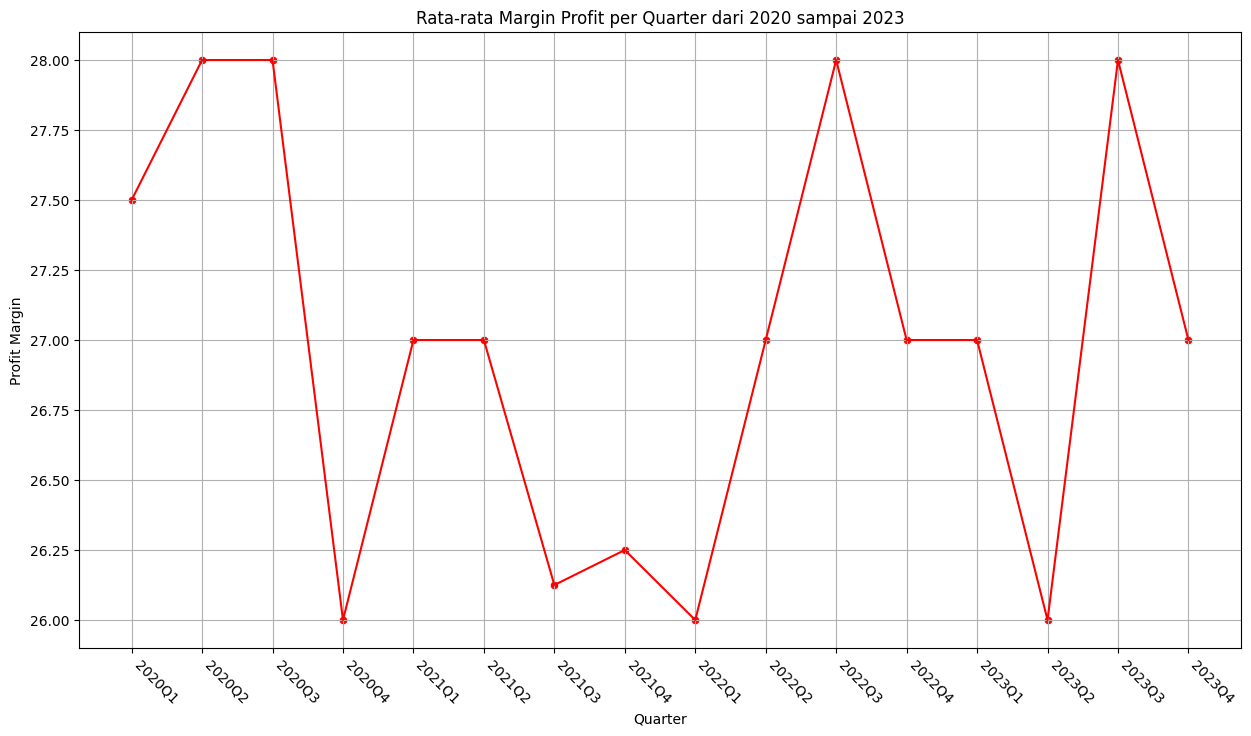

In [39]:
# Visualisasi
plt.figure(figsize=(15, 8))

sns.lineplot(tren_marg, x='Quarter', y='Profit Margin', color='red')
sns.scatterplot(tren_marg, x='Quarter', y='Profit Margin', color='red')
plt.grid(visible=True)
plt.xticks(rotation=-45, ha='left')
plt.title("Rata-rata Margin Profit per Quarter dari 2020 sampai 2023")

insight:
- Tren Sales mengalami fluktuasi dari tahun 2020 hingga 2023. Profit Margin pada `Q2 2020`, `Q3 2020`, `Q3 2022`, dan `Q3 2023` mencapai puncak tertinggi yang mencapai `28%`.
- Terdapat sebuah pola, yang dimana Profit Margin mencapai `puncak tertinggi` di `kuartal 3(Q3)` dan akan `mengalami penurunan` yang signifikan di `Akhir Tahun(Q4)`. Kenaikan ini mungkin bisa terjadi karena meningkatnya aktivitas saat liburan.
- Profit Margin yang `selalu turun di kuartal 4 (Q4)` ini mungkin disebabkan oleh Pada `Adanya Hari Besar` Seperti Black Friday dan Cyber Monday yang dimana banyak perusahaan yang memberikan diskon besar-besaran termasuk perusahaan AWS ini.
- Tahun `2021` mengalami performa yang buruk. Hal ini terjadi karena Ketidakpastian ekonomi global akibat pandemi `COVID-19` di tahun sebelumnya.

Rekomendasi:
- `Fokus pada promosi` dan peluncuran produk atau produk unggulan menjelang dan selama Q2 hingga Q3 untuk memaksimalkan potensi pendapatan.
- Daripada memberikan diskon besar-besaran pada Black Friday atau Cyber Monday, `fokus pada strategi bundling produk atau cashback` untuk tetap menarik pelanggan sambil menjaga margin.
- Analisis Produk Mana yang menghasilkan Profit Margin Tertinggi

## 7.6 Margin Profit per Produk

> Mencari Produk dengan rata-rata margin Profit Tertinggi

In [40]:
prod_marg = df.groupby(['Product'])[['Profit Margin']].median().round(2).sort_values('Profit Margin', ascending=False).reset_index()
prod_marg

,Product,Profit Margin
0,SaaS Connector Pack - Gold,46.00
1,Support,45.00
2,Alchemy,33.75
3,Storage,33.75
4,SaaS Connector Pack,27.50
5,ChatBot Plugin,27.00
6,OneView,26.00
7,ContactMatcher,25.00
8,Data Smasher,21.25
9,FinanceHub,17.78


C:\Users\rafi\AppData\Local\Temp\ipykernel_11324\1898806524.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(prod_marg, x='Product', y='Profit Margin', palette='tab20')


Text(0.5, 1.0, 'Average Margin Profit per Product')

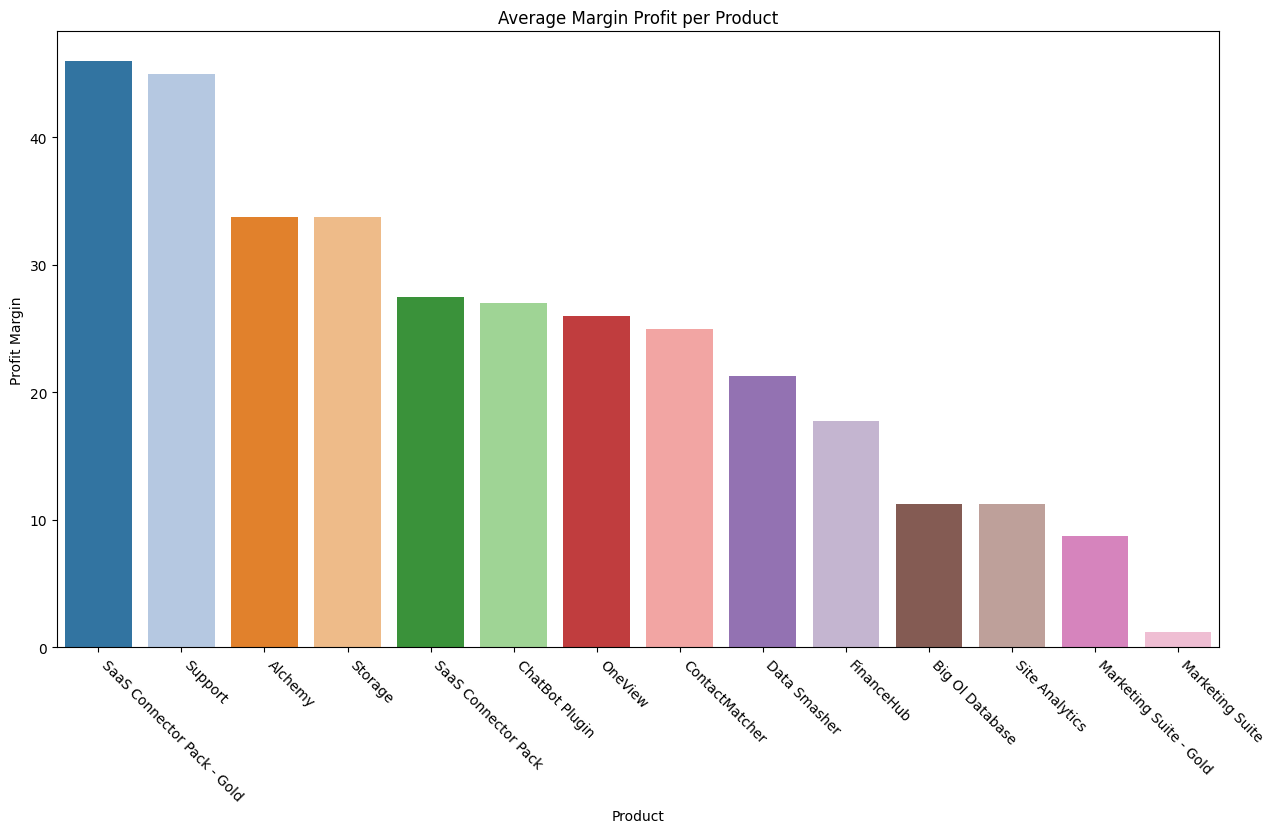

In [41]:
# Visualisasi
plt.figure(figsize=(15, 8))

sns.barplot(prod_marg, x='Product', y='Profit Margin', palette='tab20')
plt.xticks(rotation=-45, ha='left')
plt.title("Average Margin Profit per Product")

insight:
- Produk dengan rata-rata Margin Profit tertinggi adalah `SaaS Connector Pack - Gold` yang mencapai `margin 46.0%`. ini mungkin bisa terjadi karena banyak perusahaan yang membutuhkan integrasi data dari aplikasi SaaS ke layanan AWS.
- Produk `Support` juga memiliki  rata-rata Margin Profit tertinggi yang mencapai `45.0%`. Ini munngkin bisa terjadi karena banyak perusahaan yang membutuhkan bantuan dalam menjalankan operasional bisnisnya.
- Untuk Produk `Marketing Suite` memiliki rata-rata Margin Profit terendah dengan margin `1.18%`. hal ini kita perlu melihat apakah margin kecil ini karena diskon yang terlalu tinggi atau memang karena sales nya juga rendah.

Rekomendasi:
- `Mempertahan pelanggan` untuk produk `SaaS Connector Pack - Gold` dengan menambahkan fitur Integrasi Premium yang Mendukung hingga 50 konektor SaaS (misalnya, Salesforce, HubSpot, Slack, Google Workspace, Microsoft Teams,dll)
- `Mempertahan pelanggan` untuk produk `Support` dengan Akses Priority Support 24/7 melalui telepon, email, dan chat dan Akses ke konsultan teknis pribadi yang membantu optimasi infrastruktur AWS Anda.
- melihat apakah margin kecil di Produk `Marketing Suite` karena diskon yang terlalu tinggi atau memang karena sales nya juga rendah

> Mencaritahu apakah Margin Profit `Marketing Suite` karena diskon yang terlalu tinggi atau memang karena sales nya juga rendah

In [42]:
prod_price = df.groupby(['Product'])[['Price']].median().round(2).sort_values('Price', ascending=False).reset_index()
prod_price

,Product,Price
0,Alchemy,439.99
1,Big Ol Database,199.77
2,Marketing Suite,102.83
3,Site Analytics,69.99
4,FinanceHub,61.58
5,Marketing Suite - Gold,37.21
6,OneView,30.45
7,Data Smasher,29.99
8,SaaS Connector Pack,14.14
9,SaaS Connector Pack - Gold,9.30


Rata-rata Harga 1 pcs Marketing Suite `$ 102.83`

In [43]:
prod_disc = df.groupby(['Product'])[['Discount']].median().round(2).sort_values('Discount', ascending=False).reset_index()
prod_disc['Discount'] = (prod_disc['Discount']*100).astype(str) + '%'
prod_sales = df.groupby(['Product'])[['Sales']].sum().round(2).sort_values('Sales', ascending=False).reset_index()
display(prod_disc, prod_sales)

,Product,Discount
0,Alchemy,20.0%
1,Big Ol Database,20.0%
2,ContactMatcher,20.0%
3,FinanceHub,20.0%
4,Site Analytics,20.0%
5,Marketing Suite,20.0%
6,Data Smasher,0.0%
7,ChatBot Plugin,0.0%
8,OneView,0.0%
9,Marketing Suite - Gold,0.0%


,Product,Sales
0,ContactMatcher,410378.26
1,FinanceHub,340935.42
2,Site Analytics,330007.05
3,Marketing Suite - Gold,223843.61
4,Big Ol Database,189238.63
5,Data Smasher,167380.32
6,Alchemy,149528.03
7,Support,125152.74
8,Marketing Suite,114880.00
9,OneView,107532.16


ciri-ciri:
- sales produk Marketing Suite berada di urutan 9 dari 14 dengan sales mencapai `$ 114880.00`.
- rata-rata discount produk Marketing Suite cukup tinggi di `20%`
- rata-rata margin profit produk Marketing Suite sangat rendah di `1.8%`

dari ciri-ciri diatas dapat kita simpulkan:
- Rata-rata Margin profit yang terlalu rendah `disebabkan discount yang lumayan tinggi` yang padahal `rata-rata harga` setiap produknya `sudah lumayan tinggi`. 
- dari ciri-ciri diatas Produk ini mungkin `kurang diminati` dibandingkan produk lain. Hal ini mungkin bisa disebabkan oleh fitur pada produk Marketing Suite tidak sesuai dengan kebutuhan pelanggan atau fitur yang tidak sesuai dengan harganya.

Rekomendasi:
- Mengadakan survei untuk Mencari tahu apakah fitur produk Marketing Suite sesuai dengan kebutuhan pelanggan dan mengevaluasinya untuk mencari harga yang tepat tanpa bergantung dengan diskon.
- Setelah itu, Perusahaan bisa meningkatkan kampanye pemasaran untuk menjelaskan upgrade fitur produk tersebut yang sudah sesuai dengan kebutuhan pelanggan.

## 7.7 Mencari Industri dengan Margin Profit Tertinggi di setiap Segmen

In [44]:
smb_industry_marg = df[df['Segment'] == 'SMB'].groupby(['Segment', 'Industry'])[['Profit Margin']].median().round(2).sort_values('Profit Margin', ascending=False).reset_index()
smb_industry_marg['Market Share'] = round((smb_industry_marg['Profit Margin'] / smb_industry_marg['Profit Margin'].sum())*100, 2).astype(str) + '%'
ent_industry_marg = df[df['Segment'] == 'Enterprise'].groupby(['Segment', 'Industry'])[['Profit Margin']].median().round(2).sort_values('Profit Margin', ascending=False).reset_index()
ent_industry_marg['Market Share'] = round((ent_industry_marg['Profit Margin'] / ent_industry_marg['Profit Margin'].sum())*100, 2).astype(str) + '%'
stra_industry_marg = df[df['Segment'] == 'Strategic'].groupby(['Segment', 'Industry'])[['Profit Margin']].median().round(2).sort_values('Profit Margin', ascending=False).reset_index()
stra_industry_marg['Market Share'] = round((stra_industry_marg['Profit Margin'] / stra_industry_marg['Profit Margin'].sum())*100, 2).astype(str) + '%'

display(smb_industry_marg, ent_industry_marg, stra_industry_marg)

,Segment,Industry,Profit Margin,Market Share
0,SMB,Communications,28.38,10.69%
1,SMB,Energy,27.00,10.17%
2,SMB,Tech,27.00,10.17%
3,SMB,Finance,27.00,10.17%
4,SMB,Healthcare,27.00,10.17%
5,SMB,Retail,27.00,10.17%
6,SMB,Consumer Products,26.00,9.8%
7,SMB,Manufacturing,26.00,9.8%
8,SMB,Misc,25.00,9.42%
9,SMB,Transportation,25.00,9.42%


,Segment,Industry,Profit Margin,Market Share
0,Enterprise,Misc,32.5,11.61%
1,Enterprise,Retail,29.0,10.36%
2,Enterprise,Tech,29.0,10.36%
3,Enterprise,Manufacturing,28.0,10.0%
4,Enterprise,Healthcare,28.0,10.0%
5,Enterprise,Transportation,27.5,9.82%
6,Enterprise,Energy,27.0,9.64%
7,Enterprise,Consumer Products,27.0,9.64%
8,Enterprise,Communications,26.0,9.29%
9,Enterprise,Finance,26.0,9.29%


,Segment,Industry,Profit Margin,Market Share
0,Strategic,Manufacturing,29.00,10.73%
1,Strategic,Consumer Products,28.00,10.36%
2,Strategic,Retail,28.00,10.36%
3,Strategic,Misc,27.50,10.18%
4,Strategic,Energy,27.50,10.18%
5,Strategic,Finance,26.25,9.71%
6,Strategic,Communications,26.00,9.62%
7,Strategic,Healthcare,26.00,9.62%
8,Strategic,Tech,26.00,9.62%
9,Strategic,Transportation,26.00,9.62%


Text(0.5, 1.0, 'Industry dengan Margin Profit Tertinggi di Segmen Strategic')

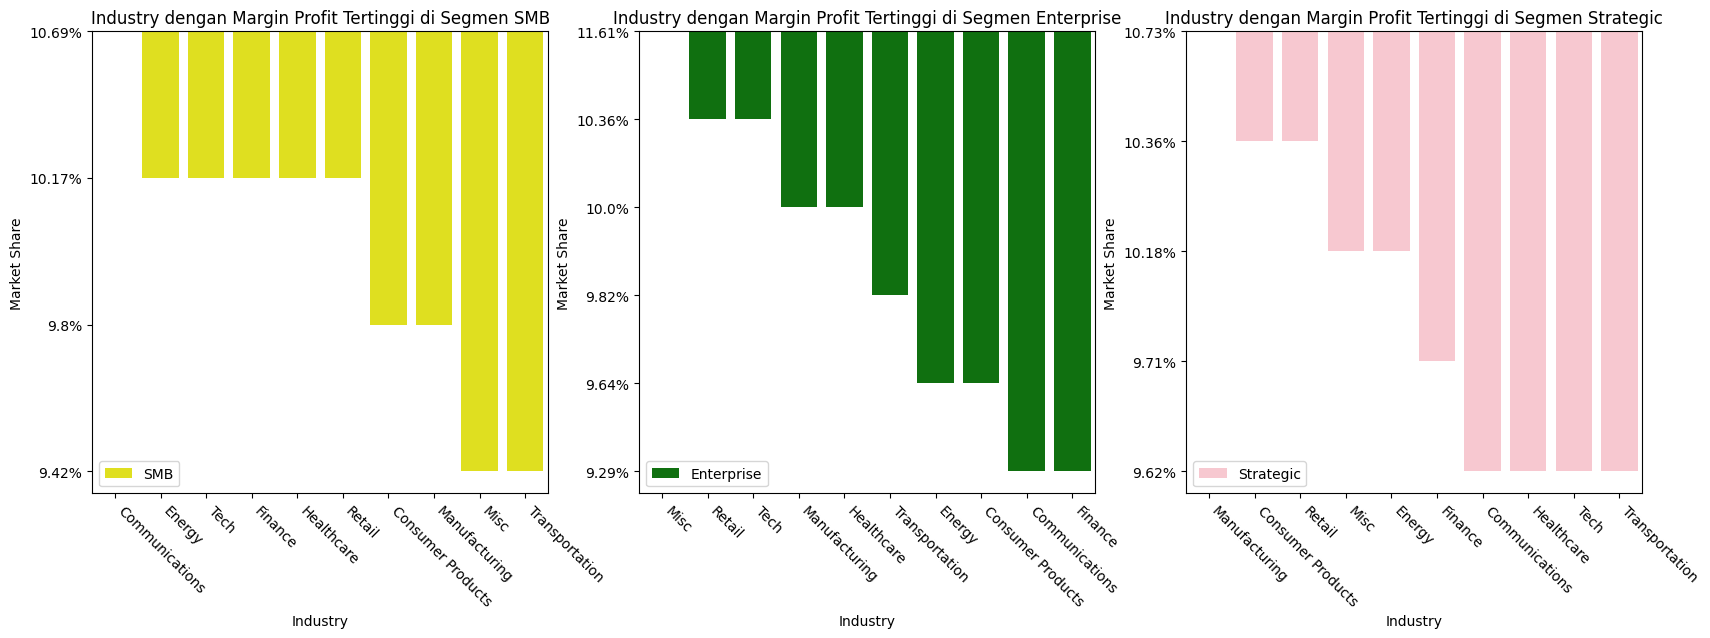

In [45]:
# Visualisasi
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
sns.barplot(smb_industry_marg, x='Industry', y='Market Share', color='yellow', label='SMB')
plt.xticks(rotation=-45, ha='left')
plt.title("Industry dengan Margin Profit Tertinggi di Segmen SMB")

plt.subplot(1,3,2)
sns.barplot(ent_industry_marg, x='Industry', y='Market Share', color='green', label='Enterprise')
plt.xticks(rotation=-45, ha='left')
plt.title("Industry dengan Margin Profit Tertinggi di Segmen Enterprise")

plt.subplot(1,3,3)
sns.barplot(stra_industry_marg, x='Industry', y='Market Share', color='pink', label='Strategic')
plt.xticks(rotation=-45, ha='left')
plt.title("Industry dengan Margin Profit Tertinggi di Segmen Strategic")

Segmen SMB:
- Industri `Communications` memiliki rata-rata profit margin tertinggi mencapai `28.38%` dengan cakupan pasar sebesar `10.69%`, menjadikannya sebagai industri paling menguntungkan di segmen SMB.
- Industri `Misc` dan `Transportation` berada di peringkat bawah dengan profit margin mencapai `25%` dengan cakupan pasar sebesar `9.42%`.

Segmen Enterprise:
- Industri `Misc` mencatatkan rata-rata profit margin tertinggi mencapai `32.5%` dengan cakupan pasar sebesar `11.61%`, menunjukkan bahwa sektor ini memiliki performa luar biasa di segmen Enterprise dibandingkan industri lainnya.
- Industri `Retail` dan `Tech` berada di `peringkat kedua` dengan rata-rata profit margin mencapai `29%` dengan cakupan pasar sebesar `10.36%`, menunjukkan `potensi profitabilitas` yang stabil di kedua sektor ini.
- Industri `Finance` dan `Communications` memiliki rata-rata profit margin terendah dibandingkan industri lainnya, yang masing-masing mencapai `26%` dengan cakupan pasar sebesar `9.29%`.

Segmen Strategic:
- Industri `Manufacturing` mencatatkan rata-rata profit margin tertinggi mencapai `29%` dengan cakupan pasar sebesar `10.73%`, menjadikannya sektor dengan performa paling unggul di segmen Strategic.
- `Consumer Products` dan `Retail` berada di `peringkat kedua` dengan rata-rata profit margin mencapai `28%` dengan cakupan pasar sebesar `10.36%`, menunjukkan potensi yang signifikan untuk kontribusi profitabilitas di segmen ini.
- `Finance`, `Communications`, `Healthcare`, `Tech`, dan `Transportation` Berada `di Bawah Rata-Rata` dengan cakupan pasar di bawah `10%`, dengan nilai margin terendah berada pada angka `26%` hingga `26.25%`, memperlihatkan potensi area peningkatan yang perlu dioptimalkan.

Rekomendasi:

Fokus utama kita berada di `Industri Misc di Segmen Enterprise`, ` Industri Communication di Segmen SMB`, dan `Industri Manufacturing di Segmen Strategic`. 
- Untuk `industri Misc di segmen Enterprise`, Perusahaaan dapat melakukan `pengembangan infrastruktur cloud kustom` yang dirancang untuk kebutuhan spesifik masing-masing klien. Hal ini dapat mencakup layanan berbasis AI, Big Data, atau analitik untuk memberikan nilai lebih bagi pelanggan.
- Karena banyak perusahaan di `segmen SMB` adalah perusahaan berkembang, maka Perusahaan dapat `menawarkan program khusus` yang membantu pelanggan memanfaatkan cloud secara maksimal dengan biaya yang lebih terjangkau. Misalnya, menawarkan program AWS Free Tier
- Untuk `industri Manufaktur di segmen strategic`, Perusahaan dapat melakukan `kerja sama dengan perusahaan-perusahaan manufaktur` untuk mengembangkan solusi berbasis cloud yang disesuaikan dengan kebutuhan mereka, seperti AWS Supply Chain, yang memungkinkan mereka untuk memonitor dan mengelola logistik dan pengiriman secara real-time

## 7.8 Mencari Negara dengan Margin Profit Tertinggi di setiap Region

In [46]:
df.groupby(['Region'])[['Profit Margin']].median().round(2).sort_values('Profit Margin', ascending=False).reset_index().head(10)

,Region,Profit Margin
0,AMER,29.0
1,EMEA,27.5
2,APJ,12.5


Dari tebel ini kita bisa melihat bahwa Region `AMER` memiliki rata-rata `profit margin tertinggi` yang mencapai `29%`. Region `APJ` memiliki memiliki rata-rata profit margin yang `jauh lebih rendah` dibandingkan region lain engan rata-rata `12%`. hal ini kita perlu melihat apakah margin kecil ini karena kurangnya promosi atau produk yang ditawarkan tidak sesuai dengan pelanggan di negara ini.

In [47]:
emea_country_marg = df[df['Region'] == 'EMEA'].groupby(['Region', 'Country'])[['Profit Margin']].median().round(2).sort_values('Profit Margin', ascending=False).reset_index().head(10)
emea_country_marg['Market Share'] = round((emea_country_marg['Profit Margin'] / emea_country_marg['Profit Margin'].sum())*100, 2).astype(str) + '%'
amer_country_marg = df[df['Region'] == 'AMER'].groupby(['Region', 'Country'])[['Profit Margin']].median().round(2).sort_values('Profit Margin', ascending=False).reset_index()
amer_country_marg['Market Share'] = round((amer_country_marg['Profit Margin'] / amer_country_marg['Profit Margin'].sum())*100, 2).astype(str) + '%'
apj_country_marg = df[df['Region'] == 'APJ'].groupby(['Region', 'Country'])[['Profit Margin']].median().round(2).sort_values('Profit Margin', ascending=False).reset_index()
apj_country_marg['Market Share'] = round((apj_country_marg['Profit Margin'] / apj_country_marg['Profit Margin'].sum())*100, 2).astype(str) + '%'

display(emea_country_marg, amer_country_marg, apj_country_marg)

,Region,Country,Profit Margin,Market Share
0,EMEA,Iceland,49.0,11.86%
1,EMEA,Austria,44.0,10.65%
2,EMEA,United Arab Emirates,43.5,10.53%
3,EMEA,Croatia,42.5,10.29%
4,EMEA,Netherlands,42.0,10.17%
5,EMEA,Ukraine,41.0,9.93%
6,EMEA,Luxembourg,40.0,9.69%
7,EMEA,Poland,39.0,9.44%
8,EMEA,Finland,36.0,8.72%
9,EMEA,Denmark,36.0,8.72%


,Region,Country,Profit Margin,Market Share
0,AMER,Argentina,33.00,16.04%
1,AMER,Colombia,32.50,15.8%
2,AMER,United States,31.25,15.19%
3,AMER,Canada,31.25,15.19%
4,AMER,Brazil,31.00,15.07%
5,AMER,Costa Rica,30.50,14.82%
6,AMER,Chile,8.75,4.25%
7,AMER,Mexico,7.50,3.65%


,Region,Country,Profit Margin,Market Share
0,APJ,India,37.00,13.82%
1,APJ,Philippines,36.50,13.63%
2,APJ,South Korea,34.00,12.7%
3,APJ,China,34.00,12.7%
4,APJ,Taiwan,32.50,12.14%
5,APJ,Indonesia,32.50,12.14%
6,APJ,New Zealand,32.50,12.14%
7,APJ,Singapore,29.00,10.83%
8,APJ,Japan,1.25,0.47%
9,APJ,Australia,-1.43,-0.53%


Text(0.5, 1.0, 'Negara dengan Margin Profit Tertinggi di Segmen Strategic')

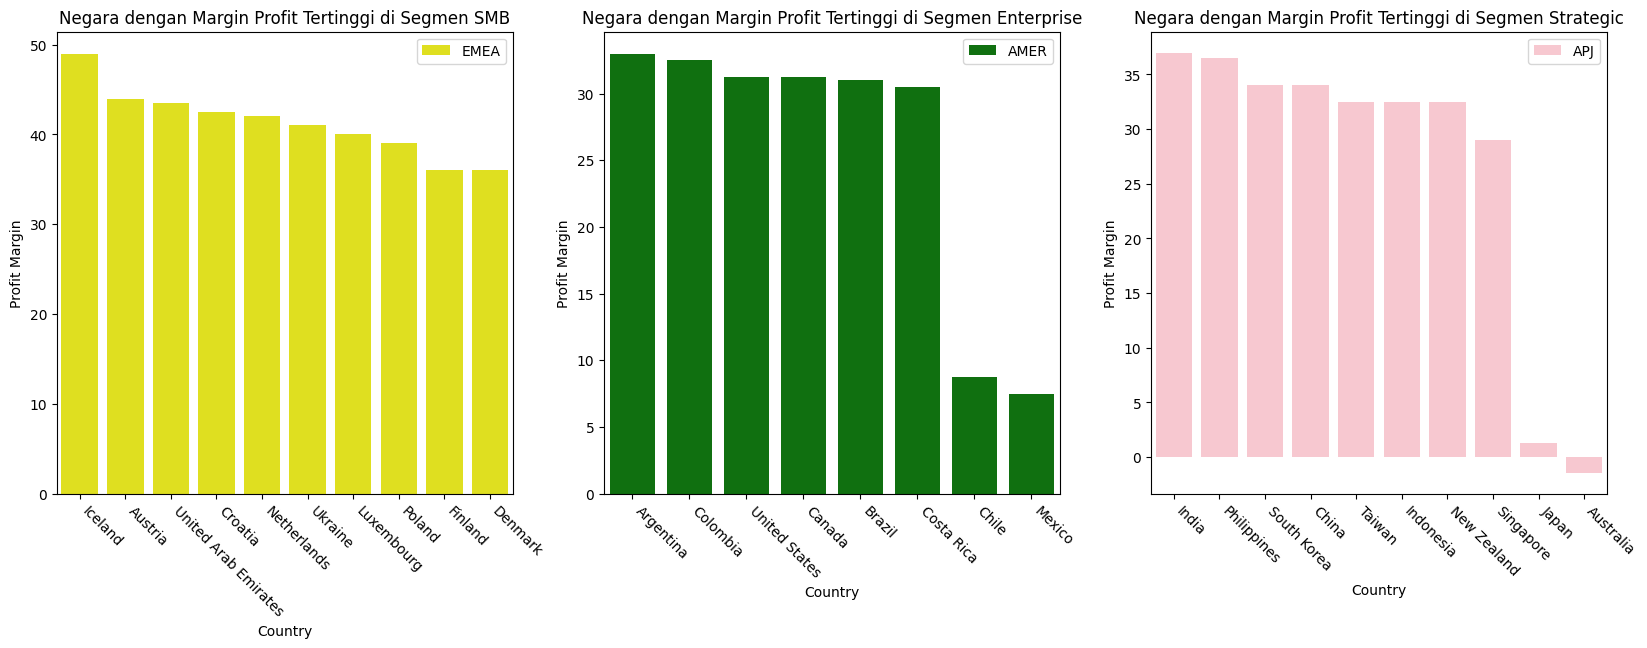

In [ ]:
# Visualisasi
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
sns.barplot(emea_country_marg, x='Country', y='Profit Margin', color='yellow', label='EMEA')
plt.xticks(rotation=-45, ha='left')
plt.title("Negara dengan Margin Profit Tertinggi di Segmen SMB")

plt.subplot(1,3,2)
sns.barplot(amer_country_marg, x='Country', y='Profit Margin', color='green', label='AMER')
plt.xticks(rotation=-45, ha='left')
plt.title("Negara dengan Margin Profit Tertinggi di Segmen Enterprise")

plt.subplot(1,3,3)
sns.barplot(apj_country_marg, x='Country', y='Profit Margin', color='pink', label='APJ')
plt.xticks(rotation=-45, ha='left')
plt.title("Negara dengan Margin Profit Tertinggi di Segmen Strategic")

Region EMEA:
- Negara `Islandia (Iceland)` memiliki rata-rata `profit margin tertinggi` yang mencapai`49%` dengan pangsa pasar di Region EMEA sebesar `11.86%`. Ini menunjukkan performa terbaik di wilayah EMEA dibandingkan negara lain.
- `Finlandia` dan `Denmark` memiliki rata-rata `profit margin terkecil`, yaitu `36%` dengan pangsa pasar di Region EMEA sebesar `8.72%`, menunjukkan kinerja yang relatif lebih rendah dibandingkan negara lainnya.
- `Tidak ada perbedaan yang terlalu signifikan` dalam profit margin antar negara di Region EMEA ini, karena `Rentang/range` yang tidak terlalu jauh, yaitu hanya `13%`. Hal ini mungkin menunjukkan strategi atau `kondisi pasar yang serupa` di Region EMEA ini.

Region AMER:
- Negara `Argentina` memiliki rata-rata `profit margin tertinggi` yang mencapai `33%` dengan pangsa pasar di Region AMER sebesar `16.04%`. Ini menunjukkan performa terbaik di wilayah AMER dibandingkan negara lain.
- Profit margin dari negara `Argentina hingga Costa Rica` Tidak ada perbedaan yang terlalu signifikan, dengan Rentang/range rata-rata berada di angka `30.5% hingga 33%`, menandakan tingkat `profitabilitas` yang relatif `konsisten` di negara-negara dengan market share besar.
- `Mexico` dan `Chile` memiliki rata-rata `profit margin yang jauh lebih rendah` dibandingkan negara lainnya. Hal ini mungkin bisa terjadi karena produk yang ditawarkan tidak sesuai dengan kebutuhan pelanggan atau karena kebijakan Pemerintah yang meningkatkan beban pajak perusahaan.

Region APJ:
- Negara `India` dan `Philippines` memiliki rata-rata `profit margin tertinggi` yang mencapai `36.5% hingga 37%` dengan pangsa pasar di Region APJ sebesar `13.63% hingga 13.82%`. Ini menunjukkan performa terbaik di wilayah APJ dibandingkan negara lain. 
- Negara-negara seperti `South Korea`, `China`, `Taiwan`, `Indonesia`, dan `New Zealand` memiliki Rentang/range rata-rata profit margin diantara `32.5% hingga 34%`
- negara `Jepang` dan `Australia` memiliki profit margin yang jauh lebih rendah hingga `mendekati 0` dibandingkan negara lainnya. Hal ini mungkin terjadi karena Jepang dan Australia mungkin memiliki pasar yang sangat kompetitif, dengan banyak pesaing lokal dan internasional.

Rekomendasi:
- `Region EMEA` Memiliki rata-rata profit margin yang `lebih tinggi` dibandingkan dengan region lain. Untuk Mempertahankan hal tersebut perusahaan dapat melakukan `promosi khusus untuk region EMEA` ini. contohnya dengan memberikan Cashback atau diskon untuk penggan yanng berada di region EMEA ini.
- `Region EMEA` Memiliki rata-rata profit margin yang `relatif stabil kecuali` di negara `Mexico` dan `Chile`. Untuk Negara `Mexico` dan `Chile`, Perusahaan perlu menganalisis apakah produk yang ditawarkan sudah sesuai dengan kebutuhan pelanggan atau tidak. Lalu perusahaan bisa mempertimbangkan apakah melanjutkan kampanye atau berhenti. Untuk Negara yang Memiliki rata-rata profit margin yang relatif stabil, Perusahaan dapat melakukan `kampanye lanjutan` untuk mempertahankan pelanggan.
- `Region APJ` Memiliki rata-rata profit margin yang `paling rendah` dibandingkan dengan region lainnya. ini terjadi karena jumlah negara yang lebih sedikit dan `persaingan bisnis` dengan banyak pesaing lokal dan internasional yang mengakibatkan rata-rata profit margin di negara `Jepang` dan `Australia` mendekati angka 0.

# 8. Kesimpulan

## 8.1.1 Kesimpulan dari Tren Sales dan Profit Berdasarkan Waktu

- Sales Dan Profit tertinggi terjadi pada `kuartal terakhir(Q4)` lebih tepatnya pada bulan `November`, dan `Desember`. 
- Sales Dan Profit terendah terjadi pada `kuartal pertama(Q1)` lebih tepatnya pada bulan `Februari`. 
- `Peningkatan Sales` cenderung `diikuti` oleh `peningkatan Profit` walaupun tidak signifikan. begitupun sebaliknya.

## 8.1.2 Kesimpulan Tren Profit Margin

- margin profit tertinggi terjadi pada hampir setiap `kuartal 3 (Q3)` lebih tepatnya pada bulan `Agutus` dan `September`.
- margin profit terendah terjadi pada hampir setiap `kuartal 4 (Q4)` lebih tepatnya pada bulan `Oktober`.
- Profit Margin pada `Q2 2020`, `Q3 2020`, `Q3 2022`, dan `Q3 2023` mencapai puncak tertinggi yang mencapai `28%`.

## 8.1.3 Kesimpulan Margin Profit per Produk

- Produk dengan rata-rata Margin Profit tertinggi adalah `SaaS Connector Pack - Gold` yang mencapai `margin 46.0%`.
- Produk `Support` juga memiliki  rata-rata Margin Profit tertinggi yang mencapai `45.0%`.
- Untuk Produk `Marketing Suite` memiliki rata-rata Margin Profit terendah dengan margin `1.18%`.
- Rata-rata Margin profit yang terlalu rendah `disebabkan discount yang lumayan tinggi` yang padahal `rata-rata harga` setiap produknya `sudah lumayan tinggi`.

## 8.1.4 Kesimpulan Industri dengan Margin Profit Tertinggi di setiap Segmen

- Industri `Communications` dari `Segmen SMB` memiliki rata-rata profit margin tertinggi mencapai `28.38%` dengan cakupan pasar sebesar `10.69%`
- Industri `Misc` dari `Segmen Enterprise` mencatatkan rata-rata profit margin tertinggi mencapai `32.5%` dengan cakupan pasar sebesar `11.61%`
- Industri `Manufacturing` dari `Segmen Strategic` mencatatkan rata-rata profit margin tertinggi mencapai `29%` dengan cakupan pasar sebesar `10.73%`

## 8.1.5 Kesimpulan Negara dengan Margin Profit Tertinggi di setiap Region

- Negara `Islandia (Iceland)` memiliki rata-rata `profit margin tertinggi` yang mencapai`49%` dengan pangsa pasar di Region EMEA sebesar `11.86%`.
- Negara `Argentina` memiliki rata-rata `profit margin tertinggi` yang mencapai `33%` dengan pangsa pasar di Region AMER sebesar `16.04%`. 
- Negara `India` dan `Philippines` memiliki rata-rata `profit margin tertinggi` yang mencapai `36.5% hingga 37%` dengan pangsa pasar di Region APJ sebesar `13.63% hingga 13.82%`.

## 8.2.1 Rekomendasi dari Tren Sales dan Profit Berdasarkan Waktu

- `Membuat Kampanye untuk Akhir Tahun` (November-Desember), karena pada bulan-bulan ini terdapat hari besar seperti Black Friday, Cyber Monday, dan Christmas. Perusahaan dapat memanfaatkan waktuhari-hari ini untuk `melakukan penawaran atau diskon khusus` untuk Customer baru maupun yang sudah ada.
- `Untuk awal tahun`, Perusahaan dapat menawarkan diskon awal tahun untuk paket berlanggana selama 1 tahunan yang akan berlaku hingga tahun berikutnya.
- `Meningkatkan Promosi di Pertengahan Tahun`, Perusahaan dapat merancang promosi atau diskon untuk layanan tertentu. Program bundling atau diskon untuk Customer baru atau yang ingin menambah kapasitas cloud mereka bisa efektif

## 8.2.2 Rekomendasi dari Tren Profit Margin

- `Fokus pada promosi` dan peluncuran produk atau produk unggulan menjelang dan selama Q2 hingga Q3 untuk memaksimalkan potensi pendapatan.
- Daripada memberikan diskon besar-besaran pada Black Friday atau Cyber Monday, `fokus pada strategi bundling produk atau cashback` untuk tetap menarik pelanggan sambil menjaga margin.

## 8.2.3 Rekomendasi Margin Profit per Produk

- `Mempertahan pelanggan` untuk produk `SaaS Connector Pack - Gold` dengan menambahkan fitur Integrasi Premium yang Mendukung hingga 50 konektor SaaS (misalnya, Salesforce, HubSpot, Slack, Google Workspace, Microsoft Teams,dll)
- `Mempertahan pelanggan` untuk produk `Support` dengan Akses Priority Support 24/7 melalui telepon, email, dan chat dan Akses ke konsultan teknis pribadi yang membantu optimasi infrastruktur AWS Anda.
- melihat apakah margin kecil di Produk `Marketing Suite` karena diskon yang terlalu tinggi atau memang karena sales nya juga rendah
- Mengadakan survei untuk Mencari tahu apakah fitur produk Marketing Suite sesuai dengan kebutuhan pelanggan dan mengevaluasinya untuk mencari harga yang tepat tanpa bergantung dengan diskon.
- Setelah itu, Perusahaan bisa meningkatkan kampanye pemasaran untuk menjelaskan upgrade fitur produk tersebut yang sudah sesuai dengan kebutuhan pelanggan.

## 8.2.4 Rekomendasi Industri dengan Margin Profit Tertinggi di setiap Segmen

Fokus utama kita berada di `Industri Misc di Segmen Enterprise`, ` Industri Communication di Segmen SMB`, dan `Industri Manufacturing di Segmen Strategic`. 
- Untuk `industri Misc di segmen Enterprise`, Perusahaaan dapat melakukan `pengembangan infrastruktur cloud kustom` yang dirancang untuk kebutuhan spesifik masing-masing klien. Hal ini dapat mencakup layanan berbasis AI, Big Data, atau analitik untuk memberikan nilai lebih bagi pelanggan.
- Karena banyak perusahaan di `segmen SMB` adalah perusahaan berkembang, maka Perusahaan dapat `menawarkan program khusus` yang membantu pelanggan memanfaatkan cloud secara maksimal dengan biaya yang lebih terjangkau. Misalnya, menawarkan program AWS Free Tier
- Untuk `industri Manufaktur di segmen strategic`, Perusahaan dapat melakukan `kerja sama dengan perusahaan-perusahaan manufaktur` untuk mengembangkan solusi berbasis cloud yang disesuaikan dengan kebutuhan mereka, seperti AWS Supply Chain, yang memungkinkan mereka untuk memonitor dan mengelola logistik dan pengiriman secara real-time

## 8.2.5 Rekomendasi Negara dengan Margin Profit Tertinggi di setiap Region

- `Region EMEA` Memiliki rata-rata profit margin yang `lebih tinggi` dibandingkan dengan region lain. Untuk Mempertahankan hal tersebut perusahaan dapat melakukan `promosi khusus untuk region EMEA` ini. contohnya dengan memberikan Cashback atau diskon untuk penggan yanng berada di region EMEA ini.
- `Region EMEA` Memiliki rata-rata profit margin yang `relatif stabil kecuali` di negara `Mexico` dan `Chile`. Untuk Negara `Mexico` dan `Chile`, Perusahaan perlu menganalisis apakah produk yang ditawarkan sudah sesuai dengan kebutuhan pelanggan atau tidak. Lalu perusahaan bisa mempertimbangkan apakah melanjutkan kampanye atau berhenti. Untuk Negara yang Memiliki rata-rata profit margin yang relatif stabil, Perusahaan dapat melakukan `kampanye lanjutan` untuk mempertahankan pelanggan.
- `Region APJ` Memiliki rata-rata profit margin yang `paling rendah` dibandingkan dengan region lainnya. ini terjadi karena jumlah negara yang lebih sedikit dan `persaingan bisnis` dengan banyak pesaing lokal dan internasional yang mengakibatkan rata-rata profit margin di negara `Jepang` dan `Australia` mendekati angka 0.